In [1]:
! mkdir ~/.kaggle

In [2]:
! cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/

In [3]:
! kaggle datasets download jayaprakashpondy/ecgimages

 98% 281M/286M [00:02<00:00, 162MB/s]
100% 286M/286M [00:02<00:00, 125MB/s]


In [4]:
! unzip /content/ecgimages.zip

Archive:  /content/ecgimages.zip
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (1).jpg  
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (10).jpg  
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (100).jpg  
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (101).jpg  
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (102).jpg  
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (103).jpg  
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (104).jpg  
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (105).jpg  
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (106).jpg  
  inflating: test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (107).jpg  
  inflating: test/ECG Images o

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Unzip the dataset
# !unzip -q ecgimages.zip

# Define constants
batch_size = 32
img_height = 224
img_width = 224
num_epochs = 10

# Create data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

# Load the ResNet50V2 model
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom classification head
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)


Found 745 images belonging to 4 classes.
Found 183 images belonging to 4 classes.
Epoch 1/10
24/24 [==============================] - 28s 1s/step - loss: 1.3567 - accuracy: 0.3705 - val_loss: 1.2206 - val_accuracy: 0.5027
Epoch 2/10
24/24 [==============================] - 23s 963ms/step - loss: 1.1620 - accuracy: 0.5302 - val_loss: 1.1302 - val_accuracy: 0.5355
Epoch 3/10
24/24 [==============================] - 22s 956ms/step - loss: 1.0621 - accuracy: 0.6134 - val_loss: 1.0667 - val_accuracy: 0.6120
Epoch 4/10
24/24 [==============================] - 24s 990ms/step - loss: 1.0012 - accuracy: 0.6362 - val_loss: 1.0176 - val_accuracy: 0.6175
Epoch 5/10
24/24 [==============================] - 24s 995ms/step - loss: 0.9417 - accuracy: 0.6591 - val_loss: 0.9716 - val_accuracy: 0.6557
Epoch 6/10
24/24 [==============================] - 22s 914ms/step - loss: 0.9067 - accuracy: 0.6872 - val_loss: 0.9497 - val_accuracy: 0.6612
Epoch 7/10
24/24 [==============================] - 23s 981ms/s

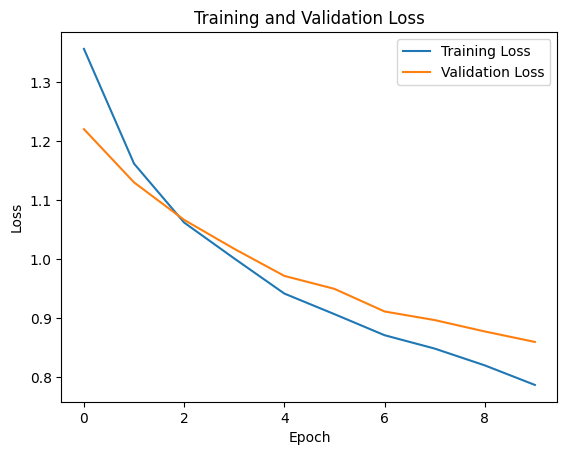

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()